# Read this first please
My computer broke down while doing this project (not because of it, just a coincidence), so I was forced to use Telecom's TP room, which I believe doesn't have Jupyter installed. So I had to upload the data to my Google drive and accessed it from there via Colab. That is why it has a few extra lines to get the data, I restored the way it was before but left the comments so I can re-run it from Colab if necessary.  

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install mdct

  Created wheel for mdct: filename=mdct-0.4-py2.py3-none-any.whl size=6387 sha256=c48bfb8cd1326ab23c5b8c42eafabaeaae59d1e8d6f0fa93cba4175016d42618
  Stored in directory: /root/.cache/pip/wheels/43/67/48/b296037a3f906072330d2a03dc19bd62f73098d9e4a4d349c3
Successfully built mdct


In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import hamming
from scipy.spatial.distance import cdist

import IPython.display as ipd
import mdct
from mdct.fast import mdct, imdct

plt.rcParams['figure.figsize'] = (12,8)

In [4]:
# useful functions

def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[:,np.newaxis]
    times = np.arange(data.shape[0])/rate
    plt.figure(figsize=(30,6))
    for channel in data.T:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()
    
def play_sound(data, rate):
    return ipd.Audio(data.T, rate=rate)

T = 220501, M = 2


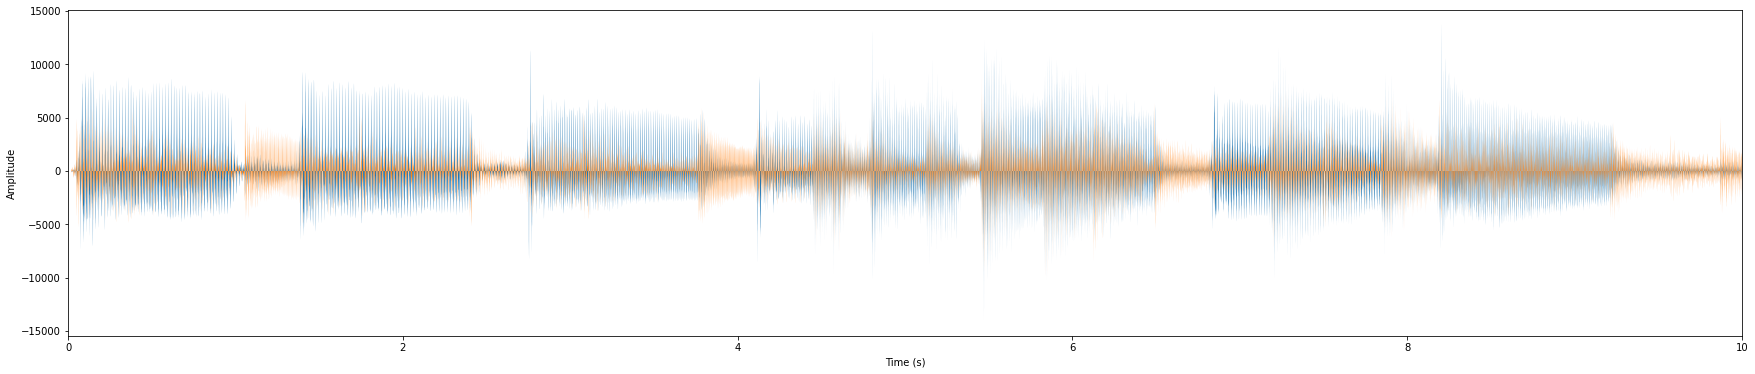

In [5]:
#fname = '/content/drive/My Drive/TSIA203/TP2/mix.wav'
fname = 'mix.wav'
rate, x = wavfile.read(fname)
print('T = {:d}, M = {:d}'.format(*x.shape))
plot_sound(x, rate)
play_sound(x, rate)

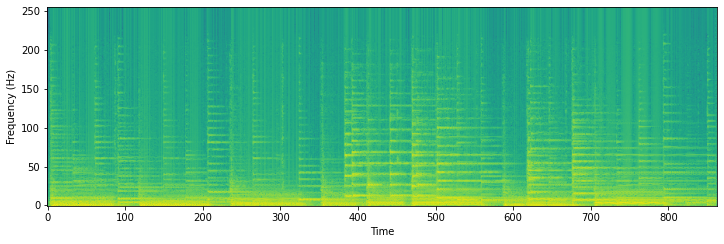

In [6]:
X = mdct(x, window=hamming, framelength=512)
Z = X.view(dtype=np.complex128)[...,0]

X_norm = np.abs(Z)**2

plt.imshow(np.log(X_norm+1e-10), origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

## 1.
You can hear two string instruments playing in the left and right, and later a piano that comes from both directions.

In [7]:
print(f'The shape is {np.shape(x)}')
t, m = np.shape(x)

The shape is (220501, 2)


## 2.

As you can see below, it is impossible to distinguish the sources from just the temporal dispersion diagram

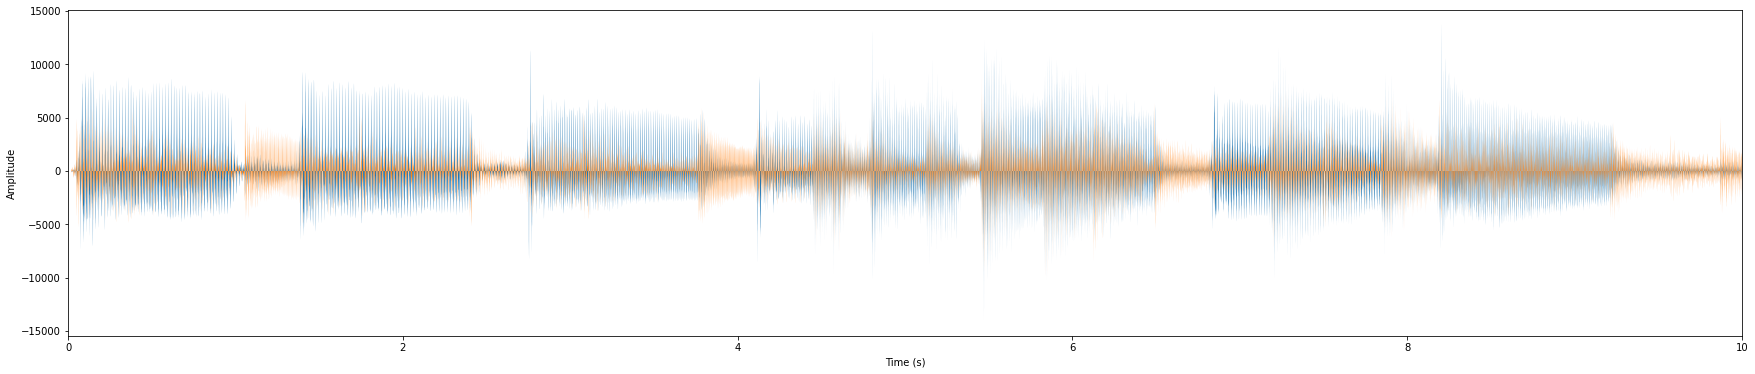

In [8]:
plot_sound(x, rate)
play_sound(x, rate)

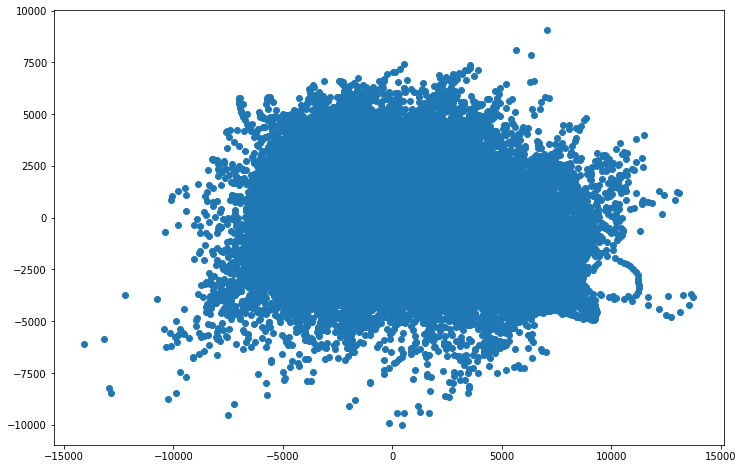

In [9]:
plt.scatter(x[:, 0], x[:, 1])

## 3.

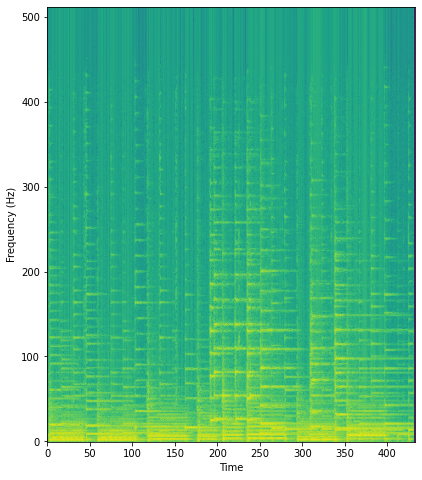

In [10]:
X = mdct(x, window=hamming)
Z = X.view(dtype=np.complex128)[...,0]

X_norm = np.abs(Z)**2

plt.imshow(np.log(X_norm+1e-10), origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

## 4.

Yes, you can now distinguish the general directions thanks to the application of the MDCT transform.

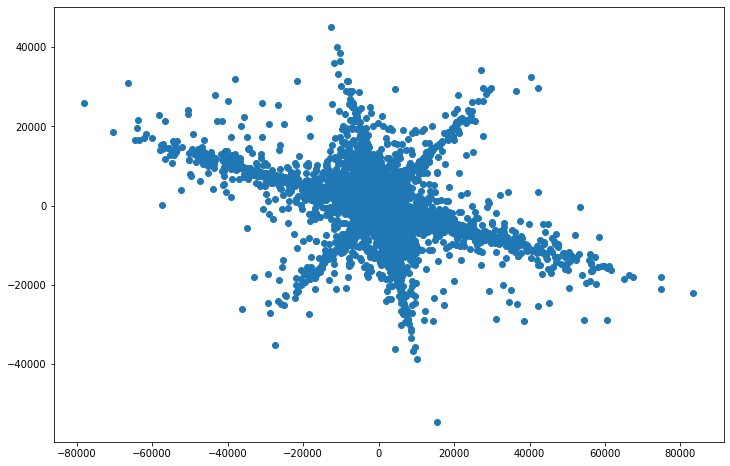

In [11]:
aux = Z.reshape(-1)
plt.scatter(np.real(aux), np.imag(aux))

## 5.

After a manual binary search of the histogram, I was able to conclude that the directions were approximately: $-1.3, -0.25$ and $0.78$.

In [12]:
real = np.real(Z)
imag = np.imag(Z)

In [13]:
angle = np.arctan(imag/real)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [14]:
F, N = np.shape(Z)

In [15]:
for i in range(F):
  for j in range(N):
    if np.isnan(angle[i][j]):
      if (imag[i][j]>0):
        angle[i][j]=np.pi/2
      if (imag[i][j]<0):
        angle[i][j]=-np.pi/2


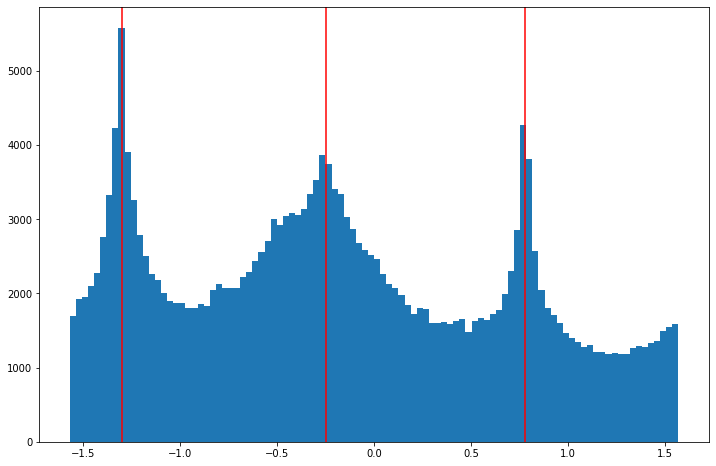

In [16]:
plt.hist(angle[~np.isnan(angle)], bins=100)
plt.axvline(-1.3, color = 'red')
plt.axvline(-0.25, color = 'red')
plt.axvline(0.78, color = 'red')
k = np.array([-1.3, -0.25, 0.78])
plt.show()

## 6.

In [47]:
B = np.zeros((F, N, 3))

In [48]:
def closest_angle(k, angle):
  aux = np.sin(abs(k-angle))
  #print(aux)
  #print(np.argmin(aux))
  return np.argmin(aux)

In [45]:
def closest_angles(k, angle):
  rec = [1, 0]
  for i in range(3):
    aux = np.sin(abs(k[i]-angle))
    if aux<rec[0]:
      rec[0]=aux
      rec[1]=i
  return i

In [49]:
a = 0
for f in range(F):
  for n in range(N):
    if np.isnan(angle[f][n]):
      B[f, n, :] = 1
    else:
      a = a+1
      B[f, n, int(closest_angle(k, angle[f][n]))] = 1
      #print(B[f, n, 0], B[f, n, 1], B[f, n, 2])
      #if a==10:
        #break
  #if a==10:
    #break

In [51]:
np.shape(B)

(512, 433, 3)

## 7.

In [64]:
Y = np.zeros((F, N, 2, 3))
y = np.zeros((221184, 2, 3))

In [65]:
for i in range(3):
  for j in range(2):
    Y[:, :, j, i] = B[:, :, i]*X[:, :, j]

In [66]:
for i in range(3):
  y[:, :, i] = imdct(Y[:, :, :, i])

/usr/local/lib/python3.7/dist-packages/stft/utils.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]
/usr/local/lib/python3.7/dist-packages/stft/utils.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]


In [67]:
play_sound(y[:, :, 0], rate)

In [68]:
play_sound(y[:, :, 1], rate)

In [69]:
play_sound(y[:, :, 2], rate)

## 8.

All three isolations were succesfull, but unfortunately they weren't free of defects. The first one, the guitar, has a notable defect towards the end, presumably when the piano was supposed to start. The base has some difficulty completely isolating the base sound, and as such, has a little noise between notes. And lastly, the piano, up until it starts playing you can noticeably hear the noise.

## 9.

Everything was computed succesfully and the song was recreated. Albeit with the base slightly louder than the original and a little bit of static. 

In [100]:
A = np.zeros((3, 2))
for i in range(3):
  A[i, 0] = np.cos(k[i])
  A[i, 1] = np.sin(k[i])

In [111]:
Y_re = np.zeros((F, N, 2))

for i in range(F):
  for j in range(N):
    Y_re[i, j, 0] = Y[i, j, 0]@A[:, 0]
    Y_re[i, j, 1] = Y[i, j, 1]@A[:, 1]

In [112]:
y_re = imdct(Y_re)

/usr/local/lib/python3.7/dist-packages/stft/utils.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]
/usr/local/lib/python3.7/dist-packages/stft/utils.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]


In [113]:
play_sound(y_re, rate)

## 10.

I swapped the angles in the A matrix and this resulted in the instruments being moved around. It is hard for me (a person without any musical background) to tell if it worked perfectly, but the piano seems to be where the guitar was. The guitar where the base was and the base where the piano was, so I would say that it worked. However, it does keep a bit of static. 

In [115]:
A = np.zeros((3, 2))
for i in range(3):
  A[i, 0] = np.cos(k[(i+1)%3])
  A[i, 1] = np.sin(k[(i+1)%3])

In [116]:
Y_re = np.zeros((F, N, 2))

for i in range(F):
  for j in range(N):
    Y_re[i, j, 0] = Y[i, j, 0]@A[:, 0]
    Y_re[i, j, 1] = Y[i, j, 1]@A[:, 1]

In [117]:
y_re = imdct(Y_re)

/usr/local/lib/python3.7/dist-packages/stft/utils.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]
/usr/local/lib/python3.7/dist-packages/stft/utils.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]


In [118]:
play_sound(y_re, rate)